# 머신러닝 실습 

## Ch2. Linear regression

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
diabetes = load_diabetes()
diabetes_DF = pd.DataFrame( diabetes['data'], columns=diabetes['feature_names'])
diabetes_DF['Y']=diabetes['target']
diabetes_DF.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
diabetes_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [10]:
y_target = diabetes_DF['Y']
X_data = diabetes_DF.drop(['Y'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(
X_data, y_target, test_size=0.4, random_state=123 )

In [11]:
lr = LinearRegression()
lr.fit ( X_train, y_train )

LinearRegression()

In [12]:
lr.intercept_

151.71551041484278

In [13]:
np.round( lr.coef_, decimals=1)

array([ -11.1, -291.1,  553.8,  296.6, -915. ,  528.4,  210.2,  339.6,
        640.6,  115.7])

In [14]:
coeff = pd.Series( data= np.round( lr.coef_, decimals=1), index=X_data.columns )
coeff.sort_values(ascending=False)

s5     640.6
bmi    553.8
s2     528.4
s4     339.6
bp     296.6
s3     210.2
s6     115.7
age    -11.1
sex   -291.1
s1    -915.0
dtype: float64

In [15]:
y_preds = lr.predict( X_test )
mse = mean_squared_error( y_test, y_preds )
rmse = np.sqrt( mse )
rmse

55.09404732888505

In [16]:
r2 = r2_score( y_test, y_preds )
r2

0.4933408690435077

In [17]:
y_train_preds = lr.predict( X_train )
mse_train = mean_squared_error( y_train, y_train_preds )
rmse_train = np.sqrt( mse_train )
rmse_train

52.9486429330168

In [18]:
r2_train = r2_score( y_train, y_train_preds )
r2_train

0.5237974491641986

In [19]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True )
kfid = kf.split(X_data)

In [20]:
kf_mse = []
for train_i, test_i in kfid:
    X_trn, X_tst = X_data.iloc[train_i], X_data.iloc[test_i]
    y_trn, y_tst = y_target.iloc[train_i], y_target.iloc[test_i]
    lr = LinearRegression()
    lr.fit ( X_trn, y_trn )
    y_preds = lr.predict( X_tst )
    mse = mean_squared_error( y_tst, y_preds )
    kf_mse.append(mse)
kf_mse

[2473.5516319387098,
 3233.267125885358,
 3553.038452271323,
 2979.5920996281343,
 2621.972092449679]

In [21]:
# 잘 안쓰고 아래꺼 K-fold api를 많이 씀
kf_rmse = np.sqrt(kf_mse)
np.mean(kf_rmse)

54.398968609104465

In [22]:
from sklearn.model_selection import cross_val_score
neg_mse_scores= cross_val_score(lr, X_data, y_target,
                                scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt( -1 * neg_mse_scores ) # 지표는 값이 큰 것을 선택하도록 내부적으로 (-) 변환
rmse_scores

array([52.72497937, 55.03486476, 56.90068179, 54.85204179, 53.94638716])

In [23]:
np.mean( rmse_scores )

54.69179097275793

In [24]:
# 변수 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dX=diabetes['data']
dy=diabetes['target']
scaler.fit( dX )
diabetes_X_scaled = scaler.transform( dX )
np.round( diabetes_X_scaled[:3], decimals=2 )

array([[ 0.8 ,  1.07,  1.3 ,  0.46, -0.93, -0.73, -0.91, -0.05,  0.42,
        -0.37],
       [-0.04, -0.94, -1.08, -0.55, -0.18, -0.4 ,  1.56, -0.83, -1.44,
        -1.94],
       [ 1.79,  1.07,  0.93, -0.12, -0.96, -0.72, -0.68, -0.05,  0.06,
        -0.55]])

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor ( max_iter=50, penalty=None, eta0=0.1 )
sgd_reg.fit( diabetes_X_scaled, dy )
print(sgd_reg.intercept_, np.round( sgd_reg.coef_, decimals=1), sep="\n")

[153.41928257]
[ -0.2 -12.2  23.5  14.  -26.7  14.2   2.1   5.7  38.2   2.7]


## Ch3. Restricted linear regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
y_target = diabetes['target']
X_data = diabetes['data']

In [3]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X_data, y_target, test_size=0.4, random_state=123 )

In [4]:
# 규제 선형회귀에서는 반드시 표준화를 해야함
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit( X_train )
X_train = scaler.transform( X_train )
X_test = scaler.transform( X_test )

::: {.callout}
전체 데이터로 표준화하고 데이터를 분리하는 방법이 있고,

데이터를 분리하고 훈련데이터로 표준화하는 방법이 있음. (교수님 선호)

표준화하고 데이터를 분리하면 훈련 및 평가 각각에 대해서는 정확히 표준화는 안됌.

데이터를 분리하고 표준화하는 경우, 훈련데이터는 정확히 평균 0 표준편차 1이 되지만,
평가데이터는 이를 만족하지 않게 됨.

두 방식에 정답은 없으나, 훈련과 평가데이터를 각각 표준화하는 방법은 피해야 함.
:::

In [7]:
# Hyperparameter (람다) 튜닝
# Cross validation, 5-fold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
alphas = [0, 0.01, 0.05, 0.1, 0.5, 1, 5]
for al in alphas:
    ridge = Ridge(alpha=al)
    neg_mse_scores = cross_val_score(ridge, X_train, y_train,
                                     scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha={} -> RMSE={}'.format(al, np.around(avg_rmse, decimals=3)))

alpha=0 -> RMSE=55.733
alpha=0.01 -> RMSE=55.733
alpha=0.05 -> RMSE=55.732
alpha=0.1 -> RMSE=55.731
alpha=0.5 -> RMSE=55.733
alpha=1 -> RMSE=55.745
alpha=5 -> RMSE=55.812


In [12]:
ridge = Ridge(alpha=0.1)
ridge.fit( X_train, y_train )
print(ridge.coef_)
print(ridge.intercept_)

[ -0.49870018 -13.84726064  27.2454048   14.23003902 -42.90654351
  24.39457638   9.53842023  16.72293446  30.53624211   5.88303717]
152.9811320754717


In [13]:
# 일반화 성능 평가
y_preds = ridge.predict( X_test )
from sklearn.metrics import mean_squared_error
np.sqrt( mean_squared_error(y_test, y_preds) )

55.089852137313954

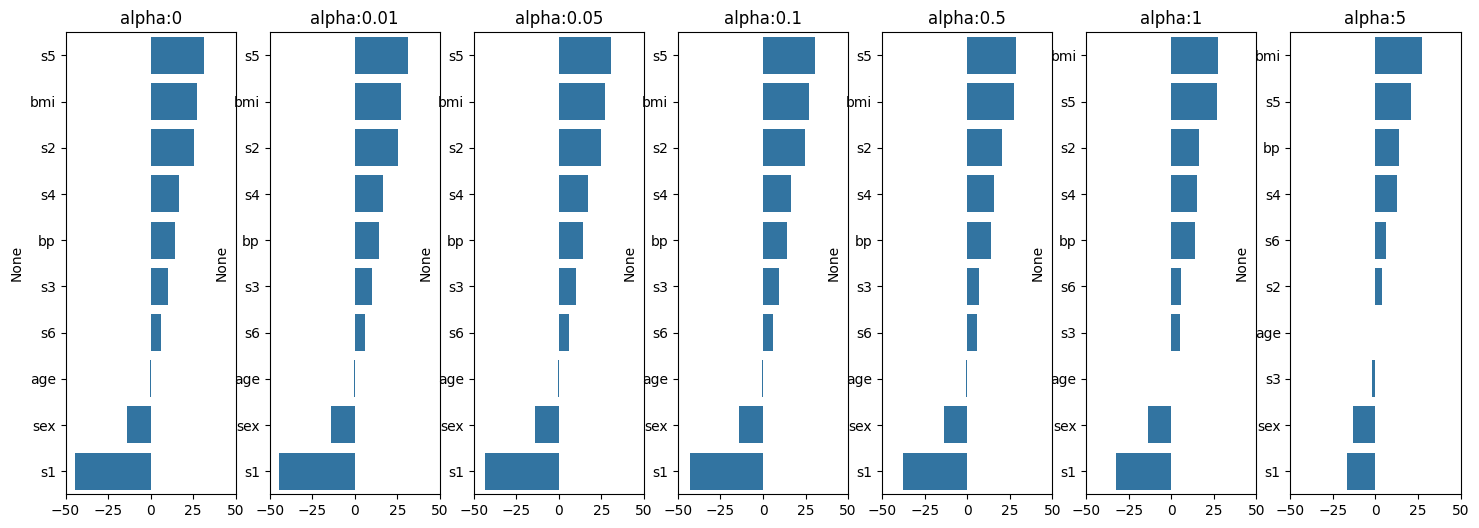

In [14]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=len(alphas))
coeff_df = pd.DataFrame()
for pos, al in enumerate(alphas):
    ridge = Ridge(alpha=al)
    ridge.fit ( X_train, y_train)
    coeff = pd.Series(data=ridge.coef_, index=diabetes['feature_names'])
    coeff = coeff.sort_values(ascending=False)
    colname = 'alpha:'+str(al)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-50,50)
    sns.barplot( x=coeff.values, y=coeff.index, ax=axs[pos])
    coeff_df[colname]=coeff

In [15]:
coeff_df

,alpha:0,alpha:0.01,alpha:0.05,alpha:0.1,alpha:0.5,alpha:1,alpha:5
s5,31.138611,31.076226,30.831553,30.536242,28.526648,26.658856,20.679753
bmi,27.225471,27.227572,27.235733,27.245405,27.305084,27.347486,27.247605
s2,25.651076,25.520922,25.010508,24.394576,20.207359,16.324820,4.084076
s4,16.927558,16.906456,16.823497,16.722934,16.023963,15.344355,12.722315
bp,14.248636,14.246725,14.239197,14.230039,14.165214,14.099670,13.796797
s3,10.239273,10.166744,9.882164,9.538420,7.190375,4.990229,-2.289360
s6,5.880362,5.880633,5.881709,5.883037,5.893123,5.904725,5.981982
age,-0.508127,-0.507153,-0.503328,-0.498700,-0.466811,-0.436305,-0.321278
sex,-13.873897,-13.871166,-13.860395,-13.847261,-13.753227,-13.655907,-13.164133
s1,-44.504536,-44.339080,-43.690071,-42.906544,-37.568138,-32.593582,-16.514538


In [16]:
# 하이퍼파라미터 튜닝을 자동으로 해주는 함수임
# score를 array로 제공하는것 뿐만 아니라, fold별 평균/분산 계산 및 model selection까지 완수
from sklearn.model_selection import GridSearchCV
parameters={'alpha': [0, 0.01, 0.05, 0.1, 0.5, 1, 5]}
ridge = Ridge( )
grid_ridge = GridSearchCV ( ridge, param_grid=parameters, cv=5,
scoring='neg_mean_squared_error',refit=True)
grid_ridge.fit( X_train, y_train )
scores_df = pd.DataFrame( grid_ridge.cv_results_)
scores_df.iloc [:, 5:]
# test score는 validation data로 평가한 score(-mse)임
# std는 split별 score의 표준편차

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,{'alpha': 0},-3464.061113,-3073.496800,-2249.443435,-3714.684946,-3135.462679,-3127.429794,496.391499,6
1,{'alpha': 0.01},-3463.952339,-3072.933041,-2249.812087,-3714.461827,-3135.734131,-3127.378685,496.206755,4
2,{'alpha': 0.05},-3463.536751,-3070.771202,-2251.269676,-3713.589310,-3136.808917,-3127.195171,495.480636,3
3,{'alpha': 0.1},-3463.057920,-3068.263953,-2253.053928,-3712.540867,-3138.126372,-3127.008608,494.600544,2
4,{'alpha': 0.5},-3460.381708,-3053.879193,-2265.950063,-3705.435057,-3147.526552,-3126.634515,488.447499,1
5,{'alpha': 1},-3458.580847,-3044.029474,-2279.280902,-3698.531771,-3156.575986,-3127.399796,482.282104,5
6,{'alpha': 5},-3451.286784,-3025.938931,-2341.662894,-3662.319607,-3180.549641,-3132.351571,451.978114,7


In [17]:
# Random split 후에 튜닝하므로 위와 최적파라미터가 달라질 수 있음.
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)

{'alpha': 0.5}
-3126.6345147986067


In [18]:
ridge_update = grid_ridge.best_estimator_
ridge_update.coef_

array([ -0.46681102, -13.75322724,  27.30508411,  14.16521425,
       -37.56813822,  20.20735883,   7.19037502,  16.02396254,
        28.52664799,   5.89312283])

In [20]:
y_pred = ridge_update.predict( X_test )
np.sqrt( mean_squared_error(y_test, y_preds) )

55.089852137313954

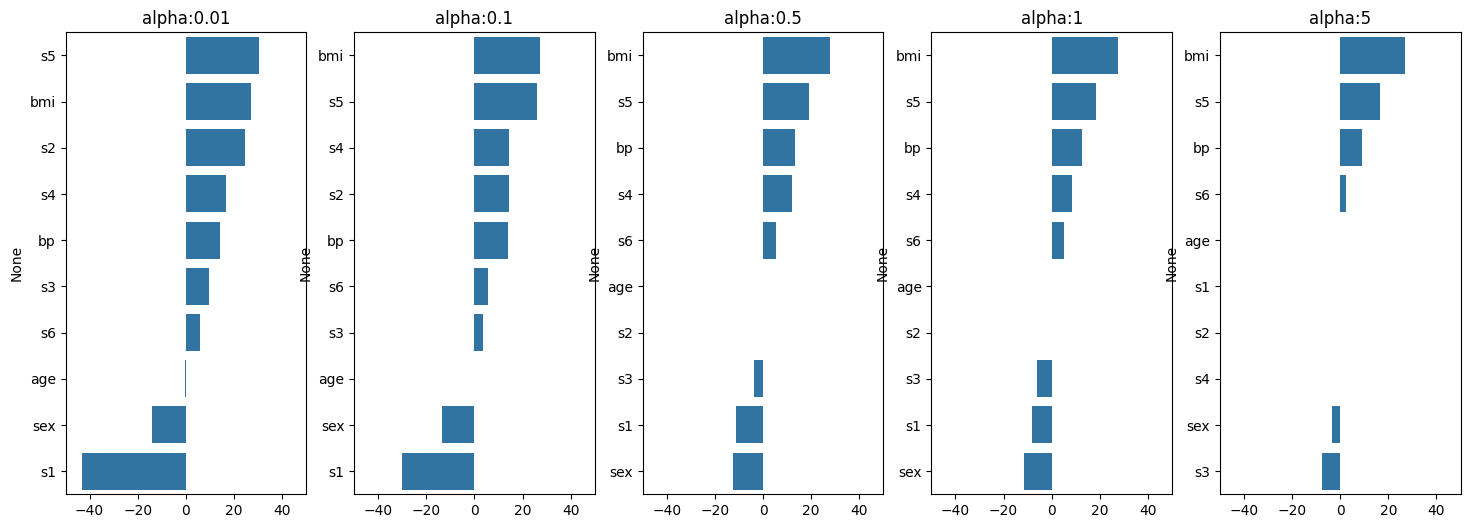

In [21]:
from sklearn.linear_model import Lasso
alphas = [0.01, 0.1, 0.5, 1, 5]
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=len(alphas))
coeff_df = pd.DataFrame()
for pos, al in enumerate(alphas):
    lasso = Lasso( alpha=al, max_iter=1000 )
    lasso.fit ( X_train, y_train)
    coeff = pd.Series(data=lasso.coef_, index=diabetes['feature_names'])
    coeff = coeff.sort_values(ascending=False)
    colname = 'alpha:'+str(al)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-50,50)
    sns.barplot( x=coeff.values, y=coeff.index, ax=axs[pos])
    coeff_df[colname]=coeff

In [22]:
coeff_df

,alpha:0.01,alpha:0.1,alpha:0.5,alpha:1,alpha:5
s5,30.609704,25.856091,18.926493,18.536744,16.632402
bmi,27.241961,27.390066,27.770736,27.646424,27.100696
s2,24.527593,14.429899,0.000000,-0.000000,-0.000000
s4,16.680089,14.454782,12.209271,8.424945,0.000000
bp,14.221648,13.978915,13.382554,12.793145,8.933273
s3,9.557877,3.432768,-3.656929,-6.063158,-7.745877
s6,5.870014,5.776940,5.495434,5.087787,2.467916
age,-0.486420,-0.291130,-0.000000,-0.000000,0.000000
sex,-13.844396,-13.579080,-12.450801,-11.420067,-3.496842
s1,-43.043735,-29.913885,-11.357006,-8.203584,-0.000000
